# 3-Clustering-Uygulama Kullanıcı Kümeleme

<img src="appusers.jpg">

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",200)
import sqlite3
from sqlite3 import Error
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

Uygulama kullanıcı segmentasyonu projesine başlamak için aşağıdaki adımları takip edebilirsiniz:

1. **Veri Setini Anlama:**
   İlk adım, elinizdeki veri setini anlamaktır. Veri seti hangi sütunlardan oluşuyor, hangi verileri içeriyor, eksik veriler var mı gibi soruları yanıtlamak önemlidir.

2. **Veri Temizliği ve Hazırlığı:**
   Veri setinizin temiz ve kullanılabilir olduğundan emin olun. Eksik verileri doldurun veya uygun bir şekilde ele alın. Verileri özellik mühendisliği ile işleyebilir ve daha anlamlı özellikler çıkarabilirsiniz. Özellikle kullanıcıların etkileşimlerini temsil eden özellikleri belirlemek önemlidir.

3. **Kullanıcı Segmentasyon Yöntemini Seçin:**
   Kullanıcıları nasıl gruplayacağınıza karar vermelisiniz. Bu, uygulamayla nasıl etkileşim kurduklarına bağlı olarak kullanıcıları belirli kriterlere göre gruplamak anlamına gelir. Örnek olarak, kullanıcıların günlük etkileşim sıklığına, uygulamayı ne kadar süre kullandıklarına veya belirli özellikleri kullanıp kullanmadıklarına göre gruplamayı düşünebilirsiniz.

4. **Kullanıcı Segmentasyonu:**
   Seçtiğiniz yönteme göre kullanıcıları gruplayın. Bu adımda, istatistiksel analiz veya makine öğrenimi gibi teknikleri kullanabilirsiniz. Segmentler oluşturduktan sonra, her segmenti daha ayrıntılı inceleyebilirsiniz.

5. **Segmentlerin Analizi:**
   Her segmenti daha ayrıntılı olarak inceleyin. Her bir segmentin uygulamanızı nasıl kullandığını ve farklılıklarını anlamak için analizler yapın.

6. **Sonuçları İzleme ve Uygulama:**
   Segmentasyon sonuçlarınızı izlemeye devam edin ve gerektiğinde güncelleyin. Bu bilgileri uygulamanızın geliştirilmesi, pazarlama stratejilerinin belirlenmesi veya kullanıcı deneyiminin iyileştirilmesi için kullanabilirsiniz.

7. **Raporlama ve İletişim:**
   Projenizin sonuçlarını yöneticilere veya ilgili paydaşlara sunmak için bir rapor hazırlayın. Rapor, segmentasyon sonuçlarınızı ve bu sonuçların uygulamanız üzerindeki etkilerini anlatmalıdır.

8. **İyileştirmeler ve Sürekli İzleme:**
   Uygulama kullanıcı segmentasyonu süreci kesintisiz bir süreçtir. Kullanıcı davranışları değiştikçe veya yeni özellikler ekledikçe segmentasyonunuzu güncellemek önemlidir.

Bu adımları takip ederek, uygulama kullanıcılarınızı etkili bir şekilde segmente edebilir ve bu bilgileri uygulamanızın geliştirilmesi için kullanabilirsiniz. Ayrıca, segmentasyonunuzu sürekli olarak gözden geçirerek kullanıcı deneyimini iyileştirmek için yeni fırsatlar keşfedebilirsiniz.

## 1.**Veri Setini Anlama:**

In [2]:
df=pd.read_csv("userbehaviour.csv")

In [3]:
df.head()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17.0,634.0,1,9,7,2990,Installed
1,1002,0.0,54.0,0,4,8,24008,Uninstalled
2,1003,37.0,207.0,0,8,5,971,Installed
3,1004,32.0,445.0,1,6,2,799,Installed
4,1005,45.0,427.0,1,5,6,3668,Installed


1. **userid**: Kullanıcı kimliği.
2. **Average Screen Time**: Ortalama ekran süresi.
3. **Average Spent on App (INR)**: Uygulamada harcanan ortalama para (INR birimiyle).
4. **Left Review**: Kullanıcının inceleme bırakıp bırakmadığını gösteren bir sütun (1 veya 0 değerleri ile kodlanmış).
5. **Ratings**: Kullanıcı tarafından verilen derecelendirme (muhtemelen 1 ila 10 arasında bir sayı).
6. **New Password Request**: Yeni şifre talebinin sayısı.
7. **Last Visited Minutes**: Kullanıcının son ziyaret ettiği dakika sayısı.
8. **Status**: Kullanıcının uygulama durumu (örneğin, "Installed" veya "Uninstalled").

In [4]:
df.describe()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,1500.000000,24.390390,424.415415,0.497497,6.513514,4.941942,5110.898899
std,288.530761,14.235415,312.365695,0.500244,2.701511,2.784626,8592.036516
min,1001.000000,0.000000,0.000000,0.000000,0.000000,1.000000,201.000000
25%,1250.500000,12.000000,96.000000,0.000000,5.000000,3.000000,1495.500000
50%,1500.000000,24.000000,394.000000,0.000000,7.000000,5.000000,2865.000000
75%,1749.500000,36.000000,717.500000,1.000000,9.000000,7.000000,4198.000000
max,1999.000000,50.000000,998.000000,1.000000,10.000000,15.000000,49715.000000


In [5]:
df.corr()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes
userid,1.000000,-0.011205,0.007211,0.011871,-0.010577,0.011876,-0.031093
Average Screen Time,-0.011205,1.000000,0.445920,-0.019984,0.557624,-0.261706,-0.458216
Average Spent on App (INR),0.007211,0.445920,1.000000,-0.022998,0.482451,-0.207935,-0.350524
Left Review,0.011871,-0.019984,-0.022998,1.000000,0.003547,0.056722,-0.004401
Ratings,-0.010577,0.557624,0.482451,0.003547,1.000000,-0.213145,-0.416936
New Password Request,0.011876,-0.261706,-0.207935,0.056722,-0.213145,1.000000,0.464466
Last Visited Minutes,-0.031093,-0.458216,-0.350524,-0.004401,-0.416936,0.464466,1.000000


In [6]:
df.shape

(999, 8)

## 2. **Veri Temizliği ve Hazırlığı:**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      999 non-null    int64  
 1   Average Screen Time         999 non-null    float64
 2   Average Spent on App (INR)  999 non-null    float64
 3   Left Review                 999 non-null    int64  
 4   Ratings                     999 non-null    int64  
 5   New Password Request        999 non-null    int64  
 6   Last Visited Minutes        999 non-null    int64  
 7   Status                      999 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


In [8]:
# Obje verimiz olan status u sayısal veriye çevirebilriz
df['Status'] = df['Status'].map({'Installed': 1, 'Uninstalled': 0})

In [9]:
# Float sütunlarını int'e çevirin (ondalık kısmı atlar)
df['Average Screen Time'] = df['Average Screen Time'].astype(int)
df['Average Spent on App (INR)'] = df['Average Spent on App (INR)'].astype(int)

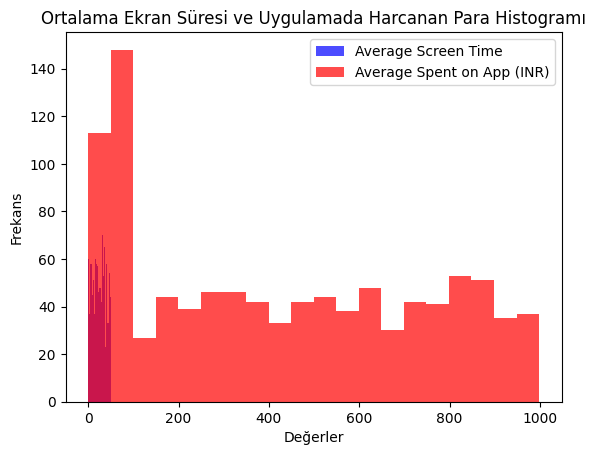

In [10]:
plt.hist(df['Average Screen Time'], bins=20, color='blue', alpha=0.7, label='Average Screen Time')
plt.hist(df['Average Spent on App (INR)'], bins=20, color='red', alpha=0.7, label='Average Spent on App (INR)')
plt.xlabel('Değerler')
plt.ylabel('Frekans')
plt.legend()
plt.title('Ortalama Ekran Süresi ve Uygulamada Harcanan Para Histogramı')
plt.show()

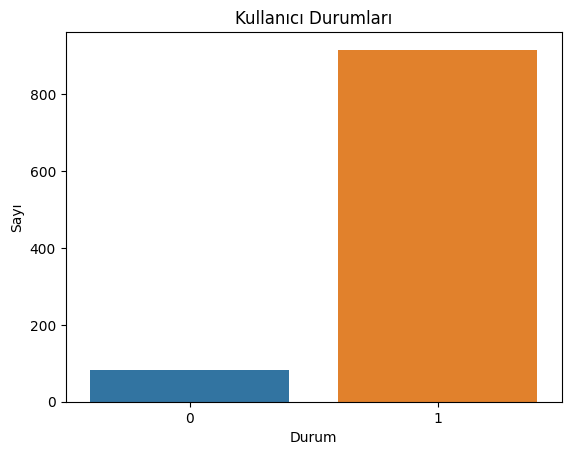

In [11]:
sns.countplot(data=df, x='Status')
plt.xlabel('Durum')
plt.ylabel('Sayı')
plt.title('Kullanıcı Durumları')
plt.show()

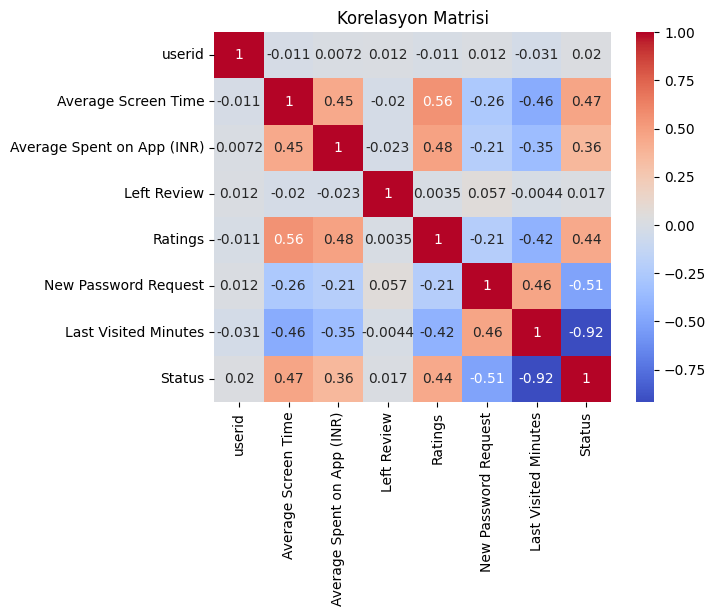

In [12]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasyon Matrisi')
plt.show()

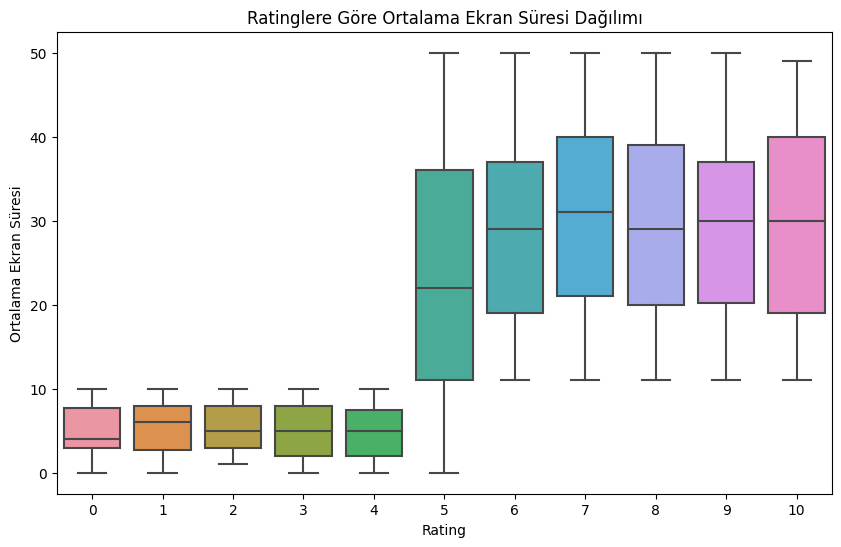

In [13]:
plt.figure(figsize=(10, 6))  # Grafiğin boyutunu ayarlayın
sns.boxplot(x='Ratings', y='Average Screen Time', data=df)
plt.xlabel('Rating')
plt.ylabel('Ortalama Ekran Süresi')
plt.title('Ratinglere Göre Ortalama Ekran Süresi Dağılımı')
plt.show()

In [14]:
df.corr()["Average Screen Time"].sort_values(ascending=False)

Average Screen Time           1.000000
Ratings                       0.557624
Status                        0.467834
Average Spent on App (INR)    0.445920
userid                       -0.011205
Left Review                  -0.019984
New Password Request         -0.261706
Last Visited Minutes         -0.458216
Name: Average Screen Time, dtype: float64

## Modelleme:

In [15]:
#Korelasyona göre x'i tanımlayabilirz
x=df[["Average Screen Time","Ratings","Status","Average Spent on App (INR)"]]

In [16]:
#K-Means kümeleme modelini oluşturuyorsunuz ve 4 küme olacak şekilde ayarlıyoruz
model=KMeans(4)

In [17]:
#Veri setinizi bu modele uyumlu hale getiriyoruz ve her veri noktasını bir kümeleme sonucu olarak tahmin ediyoruz
model=model.fit(x)

In [18]:
pred=model.predict(x)

In [19]:
silhouette_score(x,pred)

0.6233687505210258

Kümelemelerin kalitesini ölçmek için Silhouette Skoru kullanıyorsunuz. Silhouette Skoru, her veri noktasının kendi kümesi içindeki yakınlığını ve diğer kümelere olan uzaklığını dikkate alarak kümeleme kalitesini ölçer. Bu skor, her bir kümeleme sayısı için hesaplanır ve daha yüksek bir skor daha iyi bir kümeleme anlamına gelir.

In [20]:
x["cluster"]=pred

Sonraki adım, farklı kümeleme sayıları için Silhouette Skorlarını ve bu sayıları bir döngü içinde hesaplamaktır. Bu işlemi "clust" adlı bir işlev içinde yaparsınız.

In [21]:
allscore=[]
allcluster=[]
distances=[]
def clust(kactane):
    for i in range(1,kactane):
        i=i+1
        model=KMeans(i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        distance=model.inertia_
        print('Cluster ',i," score: ", score)
        allscore.append(score)
        allcluster.append(i)
        distances.append(distance)

In [22]:
clust(10)

Cluster  2  score:  0.6619565340747268
Cluster  3  score:  0.6285402344764685
Cluster  4  score:  0.6233903380573625
Cluster  5  score:  0.5978410340425868
Cluster  6  score:  0.5655805363742574
Cluster  7  score:  0.5641459833486622
Cluster  8  score:  0.5678626021687345
Cluster  9  score:  0.5390310228145321
Cluster  10  score:  0.5256494689400741


Silhouette Skoru, 2 kümeleme ile en yüksek olan skoru veriyor, yani 0.662. Bu nedenle, verilerinizi 2 kümeleme olarak bölmek, bu özel veri seti için en iyi seçenek gibi görünüyor. Ancak, bu bir kural değildir ve projenizin gereksinimlerine bağlı olarak farklı küme sayılarını da deneyebilirsiniz.

## Yellow Brick Method

In [23]:
from yellowbrick.cluster import KElbowVisualizer

In [24]:
model=KMeans()

In [25]:
visualizer=KElbowVisualizer(model,k=(2,10))

"visualizer" nesnesini veri setiniz ("x") üzerine uyarıyorsunuz. Bu işlem, farklı K değerlerini deneyerek her bir K değeri için modelin içsel kalitesini ölçer

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(2, 10))

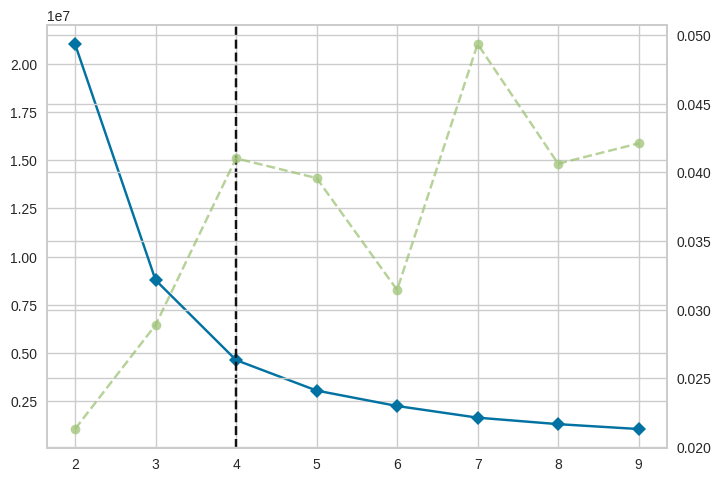

In [26]:
visualizer.fit(x)

In [27]:
visualizer.show()

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

Bu grafiği inceleyerek, "dirseği" (elbow) noktasını belirlemeye çalışabilirsiniz. Dirsek noktası, küme sayısının artmasının artık içsel kaliteyi önemli ölçüde artırmadığı noktadır. Yani, dirsek noktası, veri setiniz için en iyi küme sayısını belirlemenize yardımcı olabilir. Bu nokta, optimal küme sayısının bir tahminini sağlar ve veri setinize en iyi uyan kümeleme sayısını seçmenize yardımcı olabilir.

## Sonuç olarak:

Proje sonuçlarına göre, veri setindeki kullanıcıları K-Means kümeleme modeli ile dört farklı gruba böldük. Bu gruplar, kullanıcıların davranışlarına, uygulamayı ne kadar sık kullandıklarına ve harcadıkları para miktarına dayalı olarak oluşturuldu. Ayrıca, Silhouette Skoru kullanarak farklı kümeleme sayılarını değerlendirdik ve dört kümelik modelin en iyi sonuçları verdiğini belirledik. Bu sonuçlar, uygulama kullanıcılarını daha iyi anlamamıza ve pazarlama stratejilerini daha iyi şekillendirmemize yardımcı olacaktır. Kullanıcıları bu segmentlere göre hedeflemek, kullanıcı memnuniyetini artırabilir ve uygulama kullanımını teşvik edebilir."